# **Home Credit Indonesia PBI FINAL TASK: Risk Clients Scorecard Model**

# **PACE stages**

This project will use the PACE framework which consists of planning, analysis, construction, and execution stages.

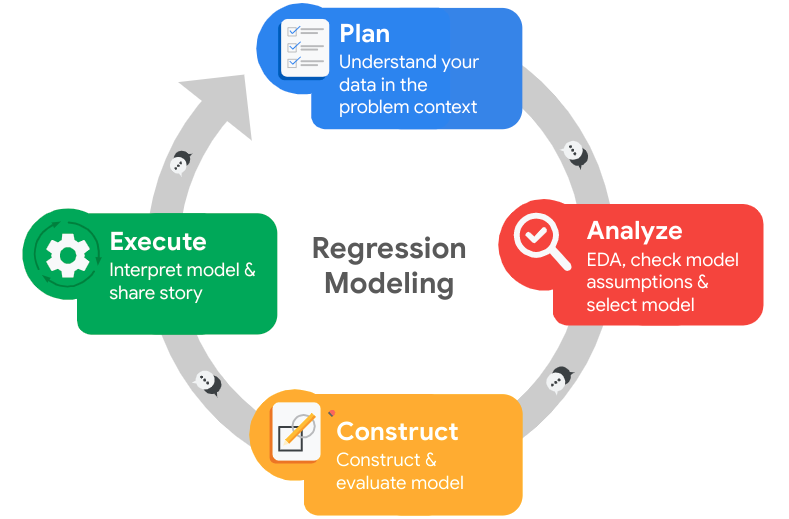

## **Pace: Plan**

### Background Task

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression.

The goal of this project is to create a Scorecard Model that can predict which clients are likely to be late in paying far beyond their due date (payment difficulties). My workflow is conduct EDA as Data Preprocessing process, build Predictive Models and Machine Learning Models, Evaluate and Compare which models that perform better, implement best model to predict test data, lastly give recommendation to reduce potential clients with risky behavior.

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [2]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# For displaying all of the columns and rows in dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For data modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load Main Dataset

`Pandas` is used to read a dataset called **`application_train.csv`.**

In [3]:
# Load train dataset into a dataframe
df_train = pd.read_csv("application_train.csv")

print('This dataset has %d rows and %d columns.\n' % df_train.shape)
df_train.tail()

This dataset has 307511 rows and 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

This train dataset is a mix of categorical and numerical value. The TARGET column which is as a differentiate between train and test dataset can be our main paramater for this study case. Beside TARGET features as our main parameter, thats a lot of feature that can be considerate to drop based on unrelated value with this study case. This will be conduct on next step which is EDA STEP.

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables and feature selection
- Clean the dataset (missing data, redundant data, outliers)

### Gather basic information about the data

In [4]:
train = df_train.copy()

train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Check missing values

In [5]:
# Check for missing values
data_null = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=['Total Null Data']).reset_index()
data_null['Percentage'] = (data_null['Total Null Data'] / len(train) ) * 100
data_null

,index,Total Null Data,Percentage
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_AVG,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_AVG,210199,68.354953
8,LIVINGAPARTMENTS_MEDI,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


Dropping Columns with >= 50% null value

Theres a lot of columns that has a very high percentage of missing values (50-70%), since the variable with high percentage is not critical to this analysis, dropping the entire column might be a more practical solution than doing imputation.

In [6]:
# Set threshold
threshold = 50  

# Calculate missing value percentage per column
missing_percent = train.isna().sum() * 100 / len(train)

# Filter columns to drop
cols_to_drop = missing_percent[missing_percent >= threshold].index

print(f"Columns to drop ({len(cols_to_drop)}):")
print(cols_to_drop)

# Drop the columns in-place
train.drop(columns=cols_to_drop, inplace=True)

train.info()

Columns to drop (41):
Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

### Handling Missing Value

In [7]:
# Handling NA with mode in object dtypes
object_columns = train.select_dtypes(include=['object']).columns.tolist()

for column in train:
    if train[column].isnull().any():
        if(column in object_columns):
            train[column]=train[column].fillna(train[column].mode()[0])

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Handling NA with median in numeric dtypes
num_columns = train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in train:
    if train[column].isnull().any():
        if(column in num_columns):
            train[column]=train[column].fillna(train[column].median())

train.select_dtypes(include=['int64','float64']).head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Check duplicates

In [9]:
# Check for duplicates
train.duplicated().sum()

np.int64(0)

There are no duplicate rows within the train dataset

### Check outliers

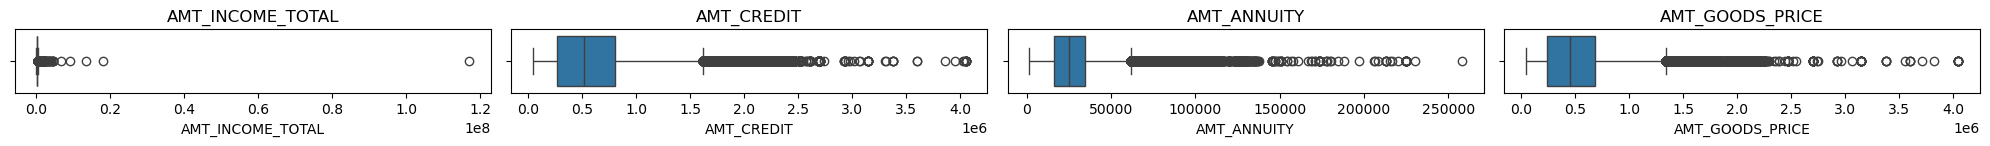

In [10]:
# Create a boxplot to visualize distribution of any `AMT` features
amt = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize=(20, 6))  # adjust size as needed
for i, column in enumerate(amt, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=train, x=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

Certain types of models are more sensitive to outliers than others. I considered leaving outliers as it is to maintain the originality of the data and prevent losing any important insights.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)


## Step 2. Data Exploration (Continue EDA)

'TARGET' variable contains: 

1 - client with payment difficulties (he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample)

0 - all other cases

Begin by understanding how many clients with payment difficulties and what percentage of all clients this figure represents.

In [11]:
# Count occurrences of each TARGET value
train0 = train.copy()
target_counts = train0['TARGET'].value_counts().sort_index()

# Create a DataFrame with labels, counts, and percentages
target_summary = pd.DataFrame({
    "Label": ["Other Cases (0)", "Payment Difficulties (1)"],
    "Count": target_counts.values,
    "Percentage (%)": (target_counts.values / len(train0)) * 100
})

print("\nTARGET Variable Distribution:")
display(target_summary)


TARGET Variable Distribution:


,Label,Count,Percentage (%)
0,Other Cases (0),282686,91.927118
1,Payment Difficulties (1),24825,8.072882


Based on 'TARGET' distribution, clients with 'payment difficulties' takes a portion of 8% who are late in paying from the time given. Since 'TARGET' classes are imbalanced which has a large gap between payment label, I will handling this class in the CONSTRUCT step.

### Data visualizations

Now, I will examine interested variables that related with clients who has a 'payment difficulties', and create plots to visualize relationships between variables in the data.

In [12]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


There are interesting columns especially the first 15 columns.
- NAME_CONTRACT_TYPE  : Identification if loan is cash or revolving
- CODE_GENDER         : Gender of the client
- FLAG_OWN_CAR	      : Flag if the client owns a car
- FLAG_OWN_REALTY     :	Flag if client owns a house or flat
- CNT_CHILDREN        :	Number of children the client has
- AMT_INCOME_TOTAL    : Income of the client
- AMT_CREDIT          : Credit amount of the loan
- AMT_ANNUITY         : Loan annuity
- AMT_GOODS_PRICE     : For consumer loans it is the price of the goods for which the loan is given
- NAME_TYPE_SUITE     : Who was accompanying client when he was applying for the loan
- NAME_INCOME_TYPE    : Clients income type (businessman, working, maternity leave,…)
- NAME_EDUCATION_TYPE : Level of highest education the client achieved
- NAME_FAMILY_STATUS  : Family status of the client
- NAME_HOUSING_TYPE   : What is the housing situation of the client (renting, living with parents, ...)


I could start by creating a stacked boxplot showing AMT_CREDIT distributions for CNT_CHILDREN, comparing the distributions of clients who has payment difficulties or not (other cases). Box plots are very useful in visualizing distributions within data.

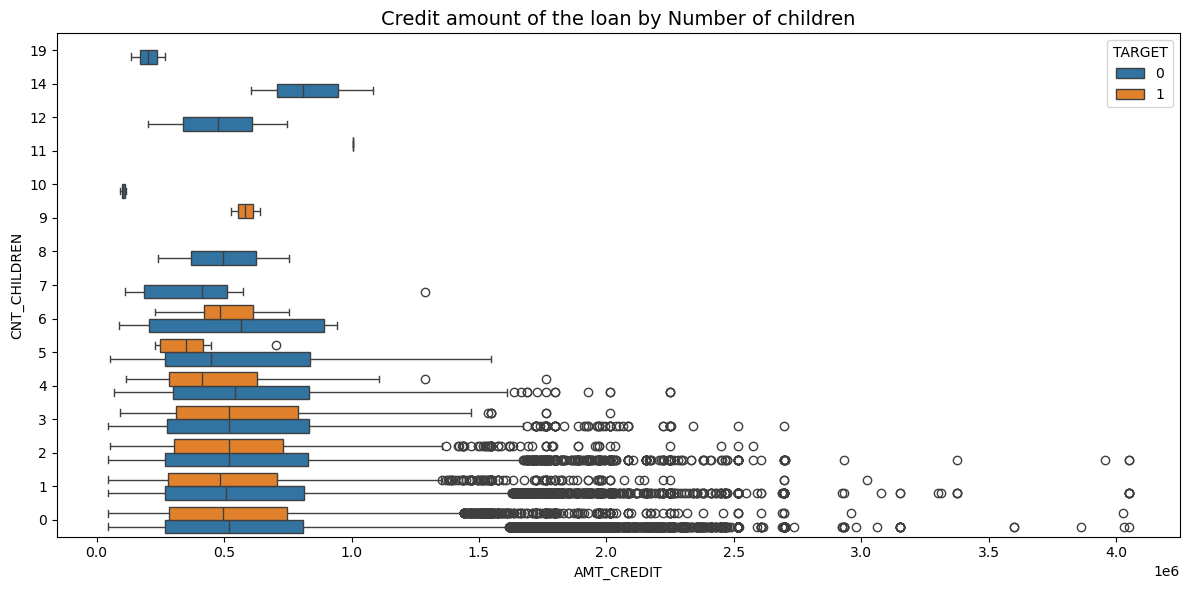

In [13]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    data=train, x='AMT_CREDIT', y='CNT_CHILDREN', hue='TARGET', orient='h')
ax.invert_yaxis()
plt.title('Credit amount of the loan by Number of children', fontsize=14)
plt.xlabel('AMT_CREDIT')
plt.ylabel('CNT_CHILDREN')
plt.legend(title='TARGET', loc='upper right')
plt.tight_layout()
plt.show()

The observations I could make from this plot.
- Clients with 'TARGET' status fall into two general categories: Clients with more children (>6) tend to have less difficulty paying and clients with fewer children (especially those aged 0 - 2) often apply for large loans and are also late in paying.
- The histogram shows that there are relatively few clients with 'Payment Difficulties' along with the increasing of their number of children. It's possible that they're the higher-paid employees or always aware to apply for loans.

In [14]:
# Create Table: NAME_INCOME_TYPE
print('Table of Clients Income Type per TARGET')
income_table = (
    train.groupby('NAME_INCOME_TYPE')['TARGET']
         .value_counts()
         .unstack(fill_value=0)
         .rename(columns={0: 'TARGET_0', 1: 'TARGET_1'})
)

income_table['Total'] = income_table['TARGET_0'] + income_table['TARGET_1']
total_income_1 = income_table['TARGET_1'].sum()
income_table['Percent_Target1 (%)'] = (income_table['TARGET_1'] / total_income_1 * 100).round(2)

display(income_table)

# Create Table: NAME_FAMILY_STATUS
print('Table of Family status of the client per TARGET')
family_table = (
    train.groupby('NAME_FAMILY_STATUS')['TARGET']
         .value_counts()
         .unstack(fill_value=0)
         .rename(columns={0: 'TARGET_0', 1: 'TARGET_1'})
)

family_table['Total'] = family_table['TARGET_0'] + family_table['TARGET_1']
total_family_1 = family_table['TARGET_1'].sum()
family_table['Percent_Target1 (%)'] = (family_table['TARGET_1'] / total_family_1 * 100).round(2)

display(family_table)

Table of Clients Income Type per TARGET


TARGET,TARGET_0,TARGET_1,Total,Percent_Target1 (%)
NAME_INCOME_TYPE,,,,
Businessman,10,0,10,0.00
Commercial associate,66257,5360,71617,21.59
Maternity leave,3,2,5,0.01
Pensioner,52380,2982,55362,12.01
State servant,20454,1249,21703,5.03
Student,18,0,18,0.00
Unemployed,14,8,22,0.03
Working,143550,15224,158774,61.33


Table of Family status of the client per TARGET


TARGET,TARGET_0,TARGET_1,Total,Percent_Target1 (%)
NAME_FAMILY_STATUS,,,,
Civil marriage,26814,2961,29775,11.93
Married,181582,14850,196432,59.82
Separated,18150,1620,19770,6.53
Single / not married,40987,4457,45444,17.95
Unknown,2,0,2,0.00
Widow,15151,937,16088,3.77


Text(0.5, 1.0, 'TARGET histogram by Clients family status')

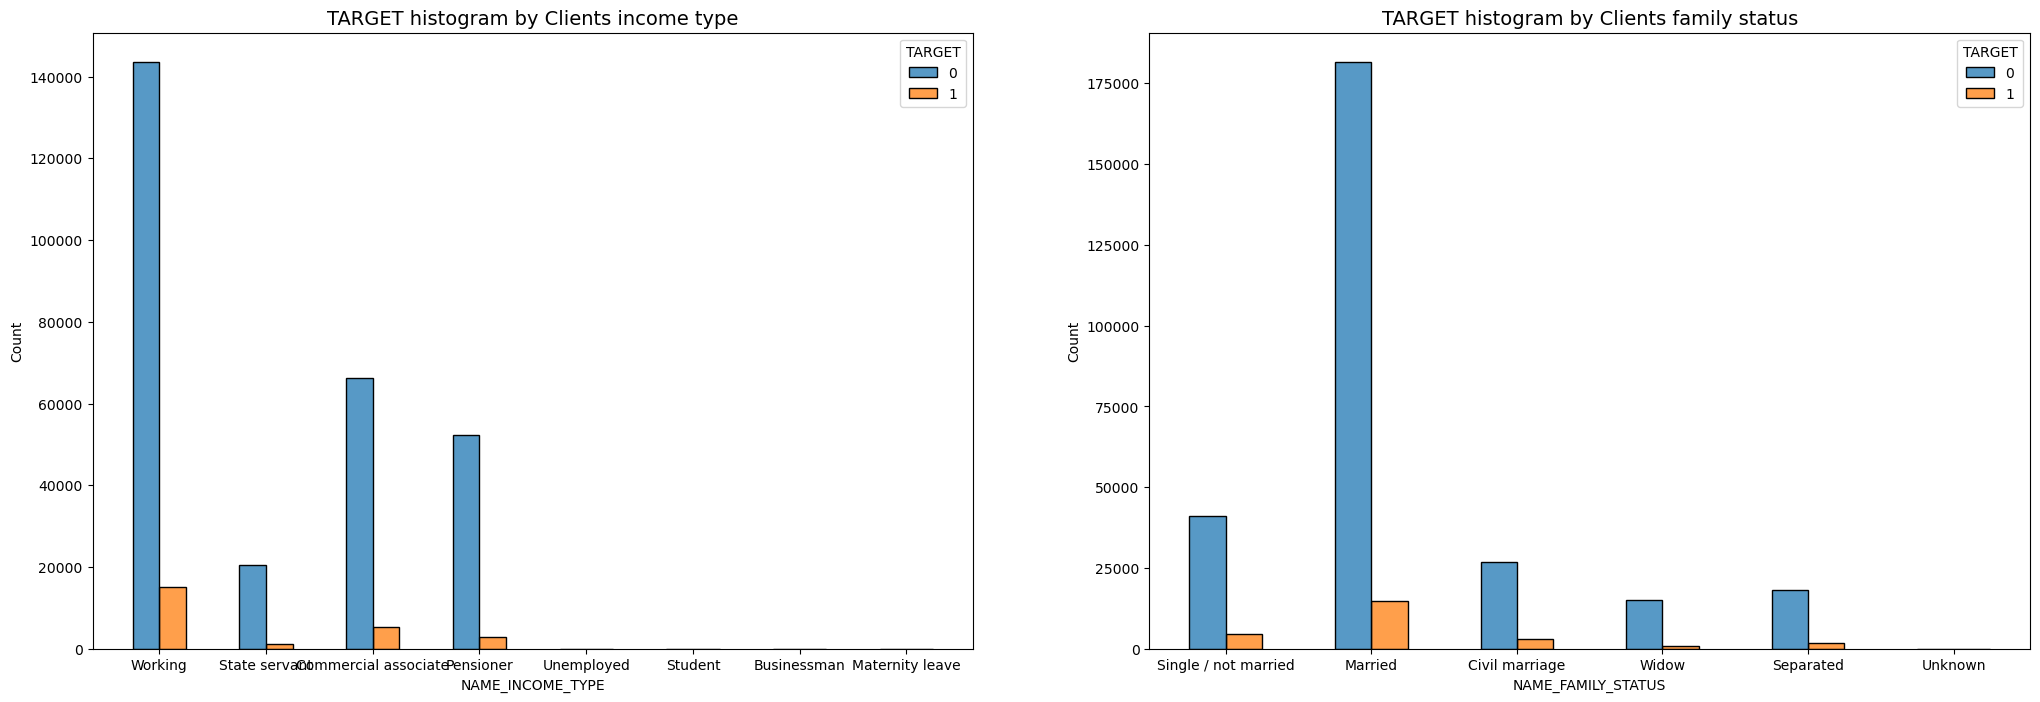

In [15]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (25,8))

# Plot short-tenured histogram
sns.histplot(data=train, x='NAME_INCOME_TYPE', hue='TARGET', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('TARGET histogram by Clients income type', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=train, x='NAME_FAMILY_STATUS', hue='TARGET', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('TARGET histogram by Clients family status', fontsize='14')

Focus on clients experiencing payment difficulties (TARGET = 1).
- Income types: Working, State servant, Commercial associate, and Pensioner received a significant percentage, especially those with the "Working" type with 61.33%.
- Clients with the "Married" family status had the highest percentage (14850 ≈ 59.82%). This could indicate clients who have just started living together or have dependents that cause them to be late in paying.

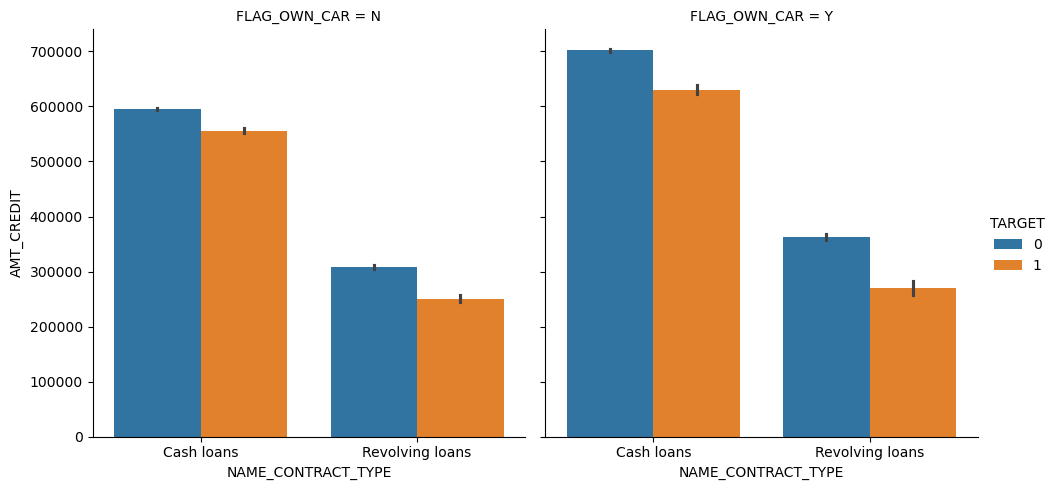

In [16]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar',
            data = train)
plt.show()

Based on vizz catplot above presented AMT_CREDIT (Credit amount of the loan) by Contract Type & Car Ownership (Split by TARGET).
- Clients with higher loan amounts tend to pay better across both car ownership groups (FLAG_OWN_CAR = Y & N). Suggests larger loans are issued to more creditworthy applicants (Stronger financial profile → lower risk of delinquency)
- Car ownership correlates with higher loan amounts but also a higher risk of late payments. Car ownership should be considered as a factor in determining clients' creditworthiness.
- Revolving loans show reduced risk exposure. Suggest Home Credit could promote revolving credit products to lower-risk customers.

Borrowers with greater financial capacity, evidenced by car ownership and higher credit limits, show lower payment difficulties. Cash loans carry higher exposure but appear to be given more carefully to stable clients.

### AGE & TARGET

Since there is no customer age column, I will create one using the DAYS_BIRTH column which contains the difference between today and the customer's birthday.

In [17]:
# Convert DAYS_BIRTH into positive Age in years
train0['Age'] = (train0['DAYS_BIRTH'] / -365).astype(int)

# Display first 10 rows of Age column
display(train0[['Age']].head(10).sort_values(by='Age', ascending=True))

,Age
0,25
6,37
9,39
1,45
5,46
7,51
3,52
2,52
4,54
8,55


,Total Clients,TARGET_0,TARGET_1
AGE_CATEGORY,,,
Adult,118081,108678,9403
Elder,97187,91718,5469
Young Adult,92243,82290,9953


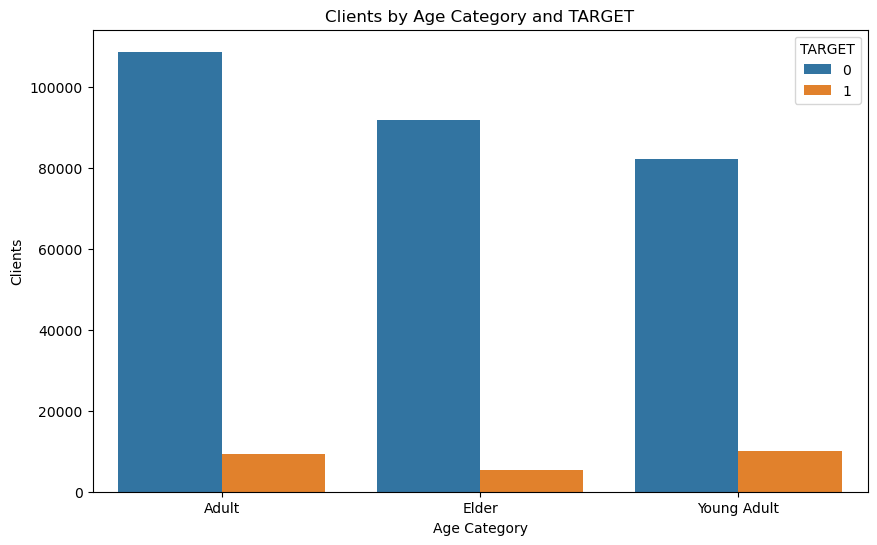

In [18]:
age_category = []
for i in train0['Age']:
    if i < 36:
        age_category.append('Young Adult')
    elif i < 51:
        age_category.append('Adult')
    else:
        age_category.append('Elder')

train0['AGE_CATEGORY'] = age_category
category_age = train0.groupby(['AGE_CATEGORY','TARGET'])['CODE_GENDER'].count().reset_index().sort_values('AGE_CATEGORY').reset_index()
category_age.rename(columns = {'CODE_GENDER' : 'Clients'}, inplace=True)
category_age.drop(columns = 'index', inplace=True)

# Create a table summary for age category counts
age_summary = (
    train0.groupby('AGE_CATEGORY')
         .agg(
             TARGET_0=('TARGET', lambda x: (x == 0).sum()),
             TARGET_1=('TARGET', lambda x: (x == 1).sum())
         ))

# Add Total column
age_summary['Total Clients'] = age_summary['TARGET_0'] + age_summary['TARGET_1']
age_summary = age_summary[['Total Clients', 'TARGET_0', 'TARGET_1']]
display(age_summary)

# Display Age by Histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE_CATEGORY', y='Clients', hue='TARGET', data=category_age)
plt.xlabel('Age Category')
plt.ylabel('Clients')
plt.title('Clients by Age Category and TARGET')
plt.legend(title='TARGET')
plt.show()

Based on the chart and table above, it can be seen that the 'Adult' age category has the largest loan applications (108678) which were paid off without any obstacles, so Home Credit can target the Adult category for loans. With the status of 'Payment Difficulties', Home Credit also needs to monitor more for the 'Adults' and 'Young Adults' categories when they apply for loans.

# paCe: Construct Stage
- One Hot Encoding and Feature Selection
- Model Building
- Evaluate model results to determine how well your model fits the data

#### One Hot Encoding
Binomial logistic regression suits the task because it involves binary classification. Converts categorical data into a numerical format that algorithms can use

In [19]:
object_encode = train.select_dtypes(include = ['object']).columns.tolist()
train[object_encode] = train[object_encode].apply(LabelEncoder().fit_transform)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection

In [20]:
# Drop any unrelated columns
train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [21]:
# Find Negative Values to Positive Values on DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']

indexes = [train.columns.get_loc(col) for col in cols]
print(indexes)

[16, 17, 19, 18, 53]


In [22]:
# Convert Negative Values to Positive Values on DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE
train.iloc[:,16:20] = train.iloc[:,16:20].abs()
train.iloc[:,53] = train.iloc[:,53].abs()
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,0,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
x = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [24]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with TARGET feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with TARGET feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
52,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


It can be seen which features correlate well with Payment Difficulties.

- Best features: DAYS_EMPLOYED, AMT_GOODS_PRICE, and AMT_CREDIT
- Worst features: AMT_REQ_CREDIT_BUREAU_HOUR, FLAG_CONT_MOBILE, and FLAG_MOBIL

In [25]:
# Feature selection with top 20 scoring
x = train[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                       'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 
                       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

y = train['TARGET']

## Step 3. Model Building

Since the variables I wanted to predict (Clients with 'Late Payments' and 'Other Cases') were categorical, I tested several Classification algorithms (supervised learning). The Machine Learning algorithms I will build are:
  1. Logistic Regression model
  2. Naive Bayes
  3. Random Forest
  4. XGBoost

### Logistic Regression

Some machine learning models (Logistic Regression, Naive Bayes) are very sensitive to imbalanced target classes — meaning their performance drops if one class heavily dominates the dataset (like TARGET=0 much more than TARGET=1). I will try using original 'TARGET' class then apply balancing method.

In [26]:
# Split the data into training set and testing set. 
# Using stratify based on the values in y, since the classes are unbalanced.
x_trainLR, x_testLR, y_trainLR, y_testLR = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

print(x_trainLR.shape, x_testLR.shape)

(230633, 20) (76878, 20)


In [27]:
# normalize features to Prevent large-scale features from dominating the model (especially for Logistic Regression)
scaler = StandardScaler()
x_trainLR = scaler.fit_transform(x_trainLR)
x_testLR = scaler.fit_transform(x_testLR)

In [28]:
#Construct a logistic regression model and fit it to the training dataset
log_model = LogisticRegression(random_state=42, max_iter=500).fit(x_trainLR, y_trainLR)

In [29]:
#Test the logistic regression model: use the model to make predictions on the test set.
# Use the logistic regression model to get predictions on the test set
y_predLR = log_model.predict(x_testLR)

Create a confusion matrix to visualize the results of the logistic regression model.

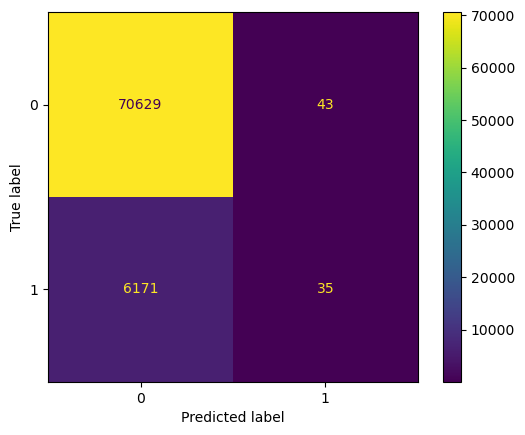

In [30]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_testLR, y_predLR, labels=log_model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [31]:
# Create classification report for logistic regression model
print('Logistic Regression Report Test Model:')
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testLR, y_predLR, target_names=target_names))

Logistic Regression Report Test Model:
                precision    recall  f1-score   support

 Other Cases_0       0.92      1.00      0.96     70672
Late Payment_1       0.45      0.01      0.01      6206

      accuracy                           0.92     76878
     macro avg       0.68      0.50      0.48     76878
  weighted avg       0.88      0.92      0.88     76878



Based on the report above, using unbalanced data causes to predict the majority class (TARGET 0) always because that gives high accuracy. So accuracy becomes misleading. I handle imbalanced data in the next step.

### Handling Imbalanced 'TARGET' class

Balancing the data is very important for Logistic Regression. When the target classes are imbalanced, like in application_train dataset (TARGET = 1 (8%), TARGET = 0 (92%)). If we train a model on imbalanced data, it often learns to predict the majority class always because that gives high accuracy. This means: Poor fraud / risk detection and High business loss from undetected defaulters

In [32]:
# Create two different dataframe of majority and minority class
target_majority = train[(train['TARGET']==0)]
target_minority = train[(train['TARGET']==1)]

# Upsample minority class
target_minority_unsampling = resample(target_minority,
                                 replace=True, # sample with replacement
                                 n_samples=282686, # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
train_upsampling = pd.concat([target_minority_unsampling, target_majority])

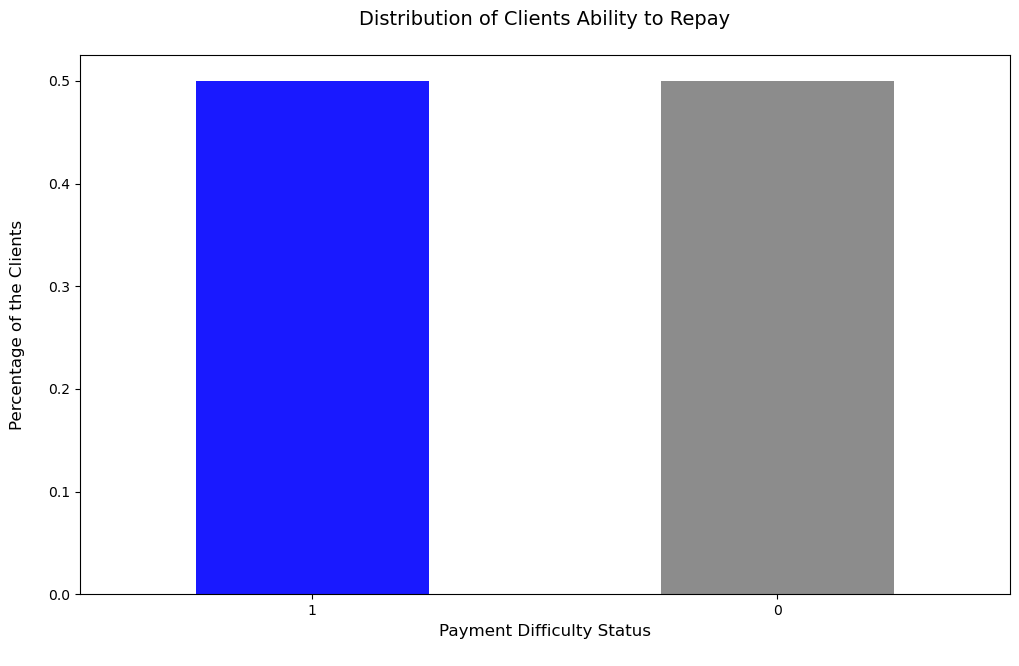

In [33]:
# Resampling visualization
fig = plt.figure(figsize = (12,7))
train_upsampling['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['blue','grey'], alpha = 0.9, rot = 0)
plt.title('Distribution of Clients Ability to Repay\n', fontsize=14)
plt.ylabel('Percentage of the Clients\n', fontsize=12)
plt.xlabel('Payment Difficulty Status\n', fontsize=12)
plt.show()

After resampling, the 'TARGET' value is balanced and the Logistic Regression model can be well carried out.

In [34]:
# DATA SPLITTING
# define x and y features (top 20 features)
x_balanced = train_upsampling[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                       'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 
                       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = train_upsampling['TARGET']

In [35]:
# splitting the data
x_trainRE, x_testRE, y_trainRE, y_testRE = train_test_split(x_balanced, 
                                                    y_balanced, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(x_trainRE.shape, x_testRE.shape)

(452297, 20) (113075, 20)


In [36]:
# normalize features
scaler = StandardScaler()
x_trainRE = scaler.fit_transform(x_trainRE)
x_testRE = scaler.fit_transform(x_testRE)

In [37]:
#Construct a logistic regression model and fit it to the training dataset
log_modelRE = LogisticRegression(random_state=42, max_iter=500).fit(x_trainRE, y_trainRE)

In [38]:
#Test the logistic regression model: use the model to make predictions on the test set.
# Use the logistic regression model to get predictions on the train set
y_predRE = log_modelRE.predict(x_testRE)

Create a confusion matrix to visualize the results of the logistic regression model (balance class).

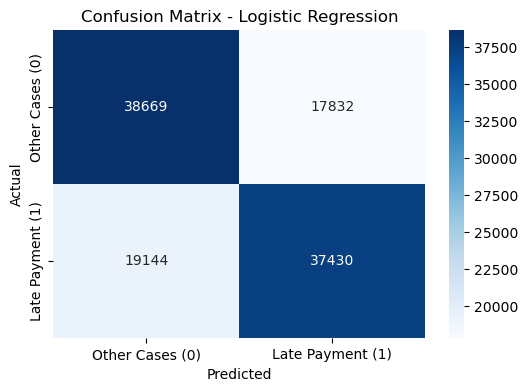

In [39]:
# Compute values for confusion matrix
cm = confusion_matrix(y_testRE, y_predRE)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Other Cases (0)', 'Late Payment (1)'],
            yticklabels=['Other Cases (0)', 'Late Payment (1)'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
# Create classification report for logistic regression model (Resampling) Test Data
print('Logistic Regression (Resampling) Report Test Model:')
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testRE, y_predRE, target_names=target_names))

# Create classification report for logistic regression model (Resampling) Train Data
y_pred_trainRE = log_modelRE.predict(x_trainRE)
print('\nLogistic Regression (Resampling) Report Train Model:')
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_trainRE, y_pred_trainRE, target_names=target_names))

Logistic Regression (Resampling) Report Test Model:
                precision    recall  f1-score   support

 Other Cases_0       0.67      0.68      0.68     56501
Late Payment_1       0.68      0.66      0.67     56574

      accuracy                           0.67    113075
     macro avg       0.67      0.67      0.67    113075
  weighted avg       0.67      0.67      0.67    113075


Logistic Regression (Resampling) Report Train Model:
                precision    recall  f1-score   support

 Other Cases_0       0.67      0.68      0.68    226185
Late Payment_1       0.68      0.66      0.67    226112

      accuracy                           0.67    452297
     macro avg       0.67      0.67      0.67    452297
  weighted avg       0.67      0.67      0.67    452297



In [41]:
# Summary Accuracy, Error, ROC AUC score of Logistic Regression Model
print('Summary Accuracy, Error, ROC AUC score of Logistic Regression Model:\n')
acc_LR_train=round(log_modelRE.score(x_trainRE,y_trainRE)*100,2)
acc_LR_test=round(log_modelRE.score(x_testRE,y_testRE)*100,2)
error_LR = round(acc_LR_test - acc_LR_train,2)
print("Training Accuracy: {} %".format(acc_LR_train))
print("Testing Accuracy: {} %".format(acc_LR_test))
print("Error: {} %".format(abs(error_LR)))

# ROC scores
# predicted probabilities of class 1
y_probaLR = log_modelRE.predict_proba(x_testRE)[:, 1]
roc_auc_LR = round(roc_auc_score(y_testRE, y_probaLR),4)
print('ROC AUC:', roc_auc_LR)

Summary Accuracy, Error, ROC AUC score of Logistic Regression Model:

Training Accuracy: 67.16 %
Testing Accuracy: 67.3 %
Error: 0.14 %
ROC AUC: 0.7324


### Gaussian Naive Bayes

Same with Logistic Regression, this algorithm also need Balanced Samples. Naive Bayes will require SMOTE method (Oversampling Minority Class). Use oversampling to help Naive Bayes see more examples of the minority class (TARGET=1). Just using Oversampled to train data only (the model should learn with balanced data) and the test set is supposed to represent real-world data distribution.

In [42]:
# Train–test split (test data must NOT be oversampled)
x_trainNB, x_testNB, y_trainNB, y_testNB = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling step
smote = SMOTE(random_state=42)
x_trainNB1, y_trainNB1 = smote.fit_resample(x_trainNB, y_trainNB)
x_testNB1, y_testNB1 = smote.fit_resample(x_testNB, y_testNB)

print("Original class distribution:")
print(y_trainNB.value_counts())
print("\nAfter oversampling:")
print(y_trainNB1.value_counts())

# Train Naive Bayes on oversampled data
nb = GaussianNB()
nb.fit(x_trainNB1, y_trainNB1)

# Evaluate on ORIGINAL (non-oversampled) test set
y_predNB = nb.predict(x_testNB)
print("\nNaive Bayes Report Test Model (Original sample):")
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testNB, y_predNB, target_names=target_names))

# Evaluate on oversampled train set
y_pred_trainNB = nb.predict(x_trainNB1)
print("\nNaive Bayes Report Train Model (Oversampling):")
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_trainNB1, y_pred_trainNB, target_names=target_names))

C:\Users\izmi0\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\izmi0\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\izmi0\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\izmi0\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Original class distribution:
TARGET
0    226148
1     19860
Name: count, dtype: int64

After oversampling:
TARGET
0    226148
1    226148
Name: count, dtype: int64

Naive Bayes Report Test Model (Original sample):
                precision    recall  f1-score   support

 Other Cases_0       0.93      0.80      0.86     56538
Late Payment_1       0.12      0.31      0.17      4965

      accuracy                           0.76     61503
     macro avg       0.53      0.56      0.52     61503
  weighted avg       0.86      0.76      0.80     61503


Naive Bayes Report Train Model (Oversampling):
                precision    recall  f1-score   support

 Other Cases_0       0.57      0.80      0.67    226148
Late Payment_1       0.67      0.40      0.50    226148

      accuracy                           0.60    452296
     macro avg       0.62      0.60      0.58    452296
  weighted avg       0.62      0.60      0.58    452296



Insight between Original and Oversampling data (Naive Bayes)
- Model 1. Test Model (Original Imbalanced Sample): The model almost ignores the risky clients (TARGET = 1). Predicts “Other cases_0” correctly, but fails where it matters most
- Model 2. Train Model (Oversampling): Recall improved for Class 1 → Model catches more risky clients, F1 score for risky class improved from 0.17 into 0.50. But accuracy drops from 0.76 → 0.60 (expected with oversampling)

As my goals is to detect clients with payment difficulties, Oversampled model is the better choice.

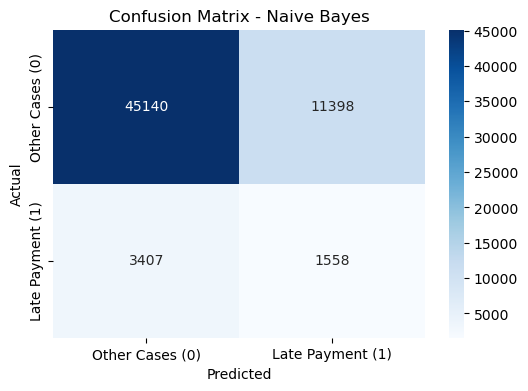

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_testNB, y_predNB)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Other Cases (0)', 'Late Payment (1)'],
            yticklabels=['Other Cases (0)', 'Late Payment (1)'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
# Evaluate on oversampled train set
y_pred_testNB = nb.predict(x_testNB1)
print("\nNaive Bayes Report Test Model (Oversampling):")
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testNB1, y_pred_testNB, target_names=target_names))

# Summary Accuracy, Error, ROC AUC score of Naive Bayes Model
print('Summary Accuracy, Error, ROC AUC score of Naive Bayes Model:\n')
acc_NB_train=round(nb.score(x_trainNB1,y_trainNB1)*100,2)
acc_NB_test=round(nb.score(x_testNB1,y_testNB1)*100,2)
error_NB = round(acc_NB_test - acc_NB_train,2)
print("Training Accuracy: {} %".format(acc_NB_train))
print("Testing Accuracy: {} %".format(acc_NB_test))
print("Error: {} %".format(abs(error_NB)))

# ROC scores Naive Bayes
# predicted probabilities of class 1
y_probaNB = nb.predict_proba(x_testNB1)[:, 1]
roc_auc_NB = round(roc_auc_score(y_testNB1, y_probaNB),4)
print('ROC AUC:', roc_auc_NB)


Naive Bayes Report Test Model (Oversampling):
                precision    recall  f1-score   support

 Other Cases_0       0.57      0.80      0.67     56538
Late Payment_1       0.67      0.41      0.51     56538

      accuracy                           0.60    113076
     macro avg       0.62      0.60      0.59    113076
  weighted avg       0.62      0.60      0.59    113076

Summary Accuracy, Error, ROC AUC score of Naive Bayes Model:

Training Accuracy: 60.0 %
Testing Accuracy: 60.28 %
Error: 0.28 %
ROC AUC: 0.6514


#### Random forest

Construct a random forest model and set up cross-validated parameters.


Random Forest Report Test Model:
                precision    recall  f1-score   support

 Other Cases_0       0.92      1.00      0.96     70672
Late Payment_1       0.48      0.00      0.00      6206

      accuracy                           0.92     76878
     macro avg       0.70      0.50      0.48     76878
  weighted avg       0.88      0.92      0.88     76878


Random Forest Report Train Model:
                precision    recall  f1-score   support

 Other Cases_0       1.00      1.00      1.00    212014
Late Payment_1       1.00      1.00      1.00     18619

      accuracy                           1.00    230633
     macro avg       1.00      1.00      1.00    230633
  weighted avg       1.00      1.00      1.00    230633



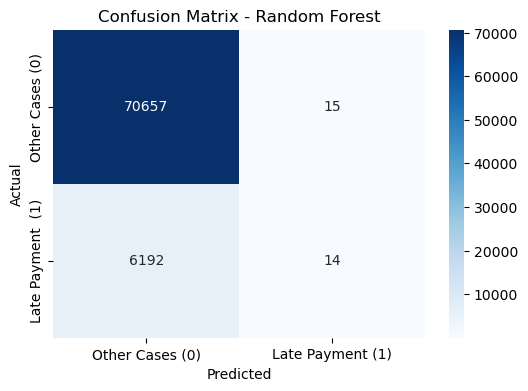

In [45]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

# Train Model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',   # handles imbalance
    random_state=42,
    n_jobs=-1
)

rf.fit(X_trainRF, y_trainRF)

# Predictions
y_predRF = rf.predict(X_testRF)
y_probRF = rf.predict_proba(X_testRF)[:, 1]

# RF Model in Test Data
print("\nRandom Forest Report Test Model:")
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testRF, y_predRF, target_names=target_names))

# RF Model in Train Data
print("\nRandom Forest Report Train Model:")
y_pred_trainRF = rf.predict(X_trainRF)
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_trainRF, y_pred_trainRF, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_testRF, y_predRF)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Other Cases (0)', 'Late Payment (1)'],
            yticklabels=['Other Cases (0)', 'Late Payment  (1)'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
# Summary Accuracy, Error, ROC AUC score of Random Forest Model
print('Summary Accuracy, Error, ROC AUC score of Random Forest Model:\n')
acc_RF_train=round(rf.score(X_trainRF,y_trainRF)*100,2)
acc_RF_test=round(rf.score(X_testRF,y_testRF)*100,2)
error_RF = round(acc_RF_test - acc_RF_train,2)
print("Training Accuracy: {} %".format(acc_RF_train))
print("Testing Accuracy: {} %".format(acc_RF_test))
print("Error: {} %".format(abs(error_RF)))

# ROC scores Random Forest
# predicted probabilities of class 1
roc_auc_RF = round(roc_auc_score(y_testRF, y_probRF),4)
print('ROC AUC:', roc_auc_RF)

Summary Accuracy, Error, ROC AUC score of Random Forest Model:

Training Accuracy: 100.0 %
Testing Accuracy: 91.93 %
Error: 8.07 %
ROC AUC: 0.7297


#### XGBoost

Construct a XGBoost model and set up cross-validated parameters.


XGBoost Report Test Model:
                precision    recall  f1-score   support

 Other Cases_0       0.96      0.71      0.82     70672
Late Payment_1       0.17      0.66      0.26      6206

      accuracy                           0.70     76878
     macro avg       0.56      0.68      0.54     76878
  weighted avg       0.89      0.70      0.77     76878


XGBoost Report Train Model:
                precision    recall  f1-score   support

 Other Cases_0       0.97      0.72      0.82    212014
Late Payment_1       0.18      0.72      0.29     18619

      accuracy                           0.72    230633
     macro avg       0.57      0.72      0.56    230633
  weighted avg       0.90      0.72      0.78    230633



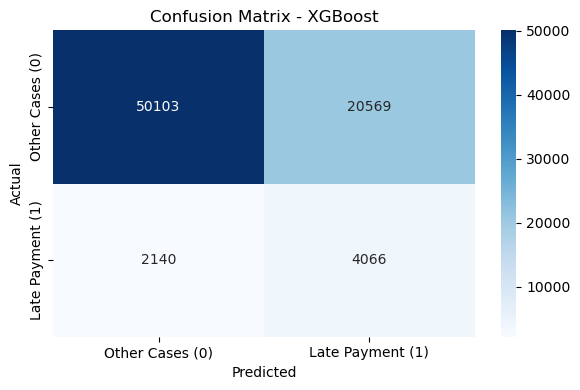

In [47]:
# Data Preparation
X_trainXGB, X_testXGB, y_trainXGB, y_testXGB = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

# Imbalance handling: ratio of negative / positive
scale_pos_weight = (y_trainXGB == 0).sum() / (y_trainXGB == 1).sum()

# Define & train model=
xgb_clf = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,  # handle imbalance
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X_trainXGB, y_trainXGB)

# Predictions
y_predXGB = xgb_clf.predict(X_testXGB)
y_probXGB = xgb_clf.predict_proba(X_testXGB)[:, 1]

# XGB Model in Test Data
print("\nXGBoost Report Test Model:")
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_testXGB, y_predXGB, target_names=target_names))

# XGB Model in Train Data
print("\nXGBoost Report Train Model:")
y_pred_trainXGB = xgb_clf.predict(X_trainXGB)
target_names = ['Other Cases_0', 'Late Payment_1']
print(classification_report(y_trainXGB, y_pred_trainXGB, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_testXGB, y_predXGB)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Other Cases (0)', 'Late Payment (1)'],
    yticklabels=['Other Cases (0)', 'Late Payment (1)']
)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [48]:
# Summary Accuracy, Error, ROC AUC score of XGBoost Model
print('Summary Accuracy, Error, ROC AUC score of XGBoost Model:\n')
acc_XGB_train=round(xgb_clf.score(X_trainXGB,y_trainXGB)*100,2)
acc_XGB_test=round(xgb_clf.score(X_testXGB,y_testXGB)*100,2)
error_XGB = round(acc_XGB_test - acc_XGB_train,2)
print("Training Accuracy: {} %".format(acc_XGB_train))
print("Testing Accuracy: {} %".format(acc_XGB_test))
print("Error: {} %".format(abs(error_XGB)))

# ROC scores XGBoost
# predicted probabilities of class 1
roc_auc_XGB = round(roc_auc_score(y_testXGB, y_probXGB),4)
print('ROC AUC:', roc_auc_XGB)

Summary Accuracy, Error, ROC AUC score of XGBoost Model:

Training Accuracy: 71.57 %
Testing Accuracy: 70.46 %
Error: 1.11 %
ROC AUC: 0.7493


# pacE: Execute Stage

## Step 4. Results and Evaluation
- Evaluate & Comparing Best Model Performance
- Test best model with 'Test' dataset
- Recommendation

### Evaluate & Comparing Best Model Performance

In [49]:
results = pd.DataFrame([["Logistic Regression", acc_LR_train, acc_LR_test, error_LR, roc_auc_LR],["Gaussian Naive Bayes", acc_NB_train, acc_NB_test, 
                       error_NB, roc_auc_NB], ["Random Forest", acc_RF_train, acc_RF_test, error_RF, roc_auc_RF], ["XGBoost", acc_XGB_train, acc_XGB_test, 
                       error_XGB, roc_auc_XGB]], columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "Error", "ROC AUC"])

results.sort_values(by=['Testing Accuracy Score', 'Error', 'ROC AUC'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,Error,ROC AUC
2,Random Forest,100.00,91.93,-8.07,0.7297
3,XGBoost,71.57,70.46,-1.11,0.7493
0,Logistic Regression,67.16,67.30,0.14,0.7324
1,Gaussian Naive Bayes,60.00,60.28,0.28,0.6514


Based on the machine learning model performance comparison table, XGBoost was found to be the best model with high score in AUC score 0.74 and least error with -1.11. Although Random Forest get the highest accuracy, this model has very high overfitting (Train score 100% → 91.9% Testing score), with error −8.07 highest rather than XGBoost has stable accuracy and Best ROC AUC. However, both models perform well and have been shown to work well with imbalanced data without using resampling.

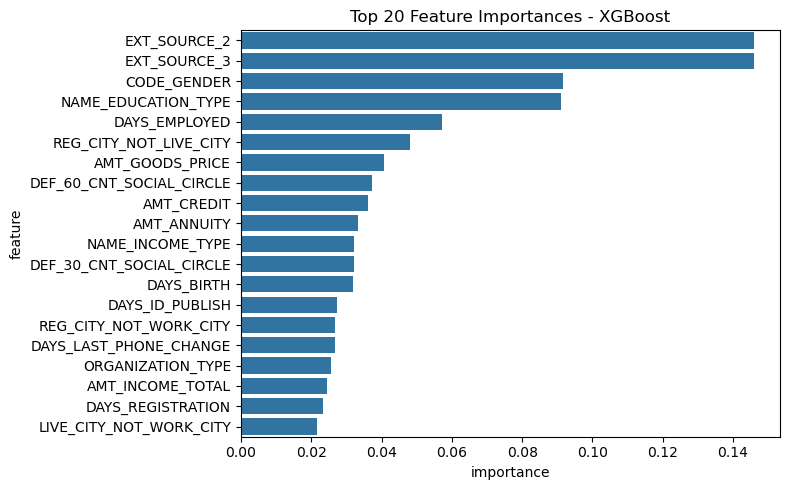

In [50]:
# Feature Importance of XGBoost
importance = pd.DataFrame({
    'feature': x.columns,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

### Test best model with 'Test' dataset

In [51]:
# Import data application (test)
df_test = pd.read_csv("application_test.csv")
print('This dataset has %d rows and %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 48744 rows and 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

### Data Preprocessing ('Test' Dataset)

In [52]:
# Detecting Duplication
print('The number of duplication is:', df_test.duplicated().sum())

The number of duplication is: 0


In [53]:
# Detecting Missing Value
print('Missing values status:', df_test.isnull().values.any())
msv = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
msv['Percentage'] = (msv['Total Null Values']/df_test.shape[0])*100
msv.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MEDI,33495,68.716150
2,COMMONAREA_MODE,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
5,NONLIVINGAPARTMENTS_MODE,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_MEDI,32780,67.249302
8,LIVINGAPARTMENTS_AVG,32780,67.249302
9,LIVINGAPARTMENTS_MODE,32780,67.249302


In [54]:
# drop features that have large number of missing values (± 40%)
test = df_test.copy()
# Set threshold
threshold = 50  

# Calculate missing value percentage per column
missing_percent = test.isna().sum() * 100 / len(test)

# Filter columns to drop
cols_to_drop = missing_percent[missing_percent >= threshold].index

print(f"Columns to drop ({len(cols_to_drop)}):")
print(cols_to_drop)

# Drop the columns in-place
test.drop(columns=cols_to_drop, inplace=True)

# drop features that unrelated with analysis
test.drop(test.iloc[:,66:91], inplace=True, axis=1)

test.info()

Columns to drop (29):
Index(['OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    48744 non-null  int64  
 1   NA

In [55]:
# input missing values with mode for categorical features
# input missing values with median because the data is skewed for numerical features

category_columns = test.select_dtypes(include=['object']).columns.tolist()
integer_columns = test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in test:
  if test[column].isnull().any():
    if(column in category_columns):
      test[column]=test[column].fillna(test[column].mode()[0])
    else:
      test[column]=test[column].fillna(test[column].median())

# Check Missing Value
print('Missing values status:\n', test.isnull().values.any())
print('The number of missing values for each columns (after imputation):\n')
test2 = pd.DataFrame(test.isnull().sum().sort_values(), columns=['Total Null Values'])
test2['Percentage'] = (test2['Total Null Values']/test.shape[0])*100
test2.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status:
 False
The number of missing values for each columns (after imputation):



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,CODE_GENDER,0,0.0
3,FLAG_OWN_CAR,0,0.0
4,FLAG_OWN_REALTY,0,0.0
5,CNT_CHILDREN,0,0.0
6,AMT_INCOME_TOTAL,0,0.0
7,AMT_CREDIT,0,0.0
8,AMT_ANNUITY,0,0.0
9,AMT_GOODS_PRICE,0,0.0


### Label Encoding ('Test' Dataset)
Since XGBoost still needs all features to be numeric. If the dataset contains object / string / category columns, they must be encoded.

In [56]:
test_encode = test.select_dtypes(include = ['object']).columns.tolist()
test[object_encode] = test[object_encode].apply(LabelEncoder().fit_transform)
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,block of flats,0.0392,"Stone, brick",0,0.0,0.0,0.0,0.0,-1740.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,-856.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,block of flats,0.3700,Panel,0,0.0,0.0,0.0,0.0,-1805.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,-821.0,2.0


In [57]:
# Find Negative Values to Positive Values on DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']

indexes = [test.columns.get_loc(col) for col in cols]
print(indexes)

[16, 17, 19, 18, 65]


In [58]:
# Convert Negative Values to Positive Values on DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE
test.iloc[:,16:20] = test.iloc[:,16:20].abs()
test.iloc[:,65] = test.iloc[:,65].abs()
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.752614,0.789654,0.159520,0.0660,0.9732,0.1379,0.1250,0.0505,0.0672,0.9732,0.1379,0.1250,0.0526,0.0666,0.9732,0.1379,0.1250,0.0514,block of flats,0.0392,"Stone, brick",0,0.0,0.0,0.0,0.0,1740.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.564990,0.291656,0.432962,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.506771,0.699787,0.610991,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,856.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.525734,0.509677,0.612704,0.3052,0.9970,0.2759,0.3750,0.3673,0.3109,0.9970,0.2759,0.3750,0.3827,0.3081,0.9970,0.2759,0.3750,0.3739,block of flats,0.3700,Panel,0,0.0,0.0,0.0,0.0,1805.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.202145,0.425687,0.519097,0.0928,0.9816,0.1379,0.1667,0.0770,0.0851,0.9816,0.1379,0.1667,0.0751,0.0926,0.9816,0.1379,0.1667,0.0776,block of flats,0.0707,Panel,0,0.0,0.0,0.0,0.0,821.0,2.0


### Prediction with XGBoost ('Test' Dataset)

In [59]:
# Feature selection with top 20 scoring (based on Train data)
pred_test = test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                       'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 
                       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [60]:
# Predict The Model
predict = pd.Series(xgb_clf.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application_test.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,1


Summary of Payment Difficulties Status
Total Records: 48,744
Late Payment (1): 14,791 (30.34%)
Other Cases (0): 33,953 (69.66%)



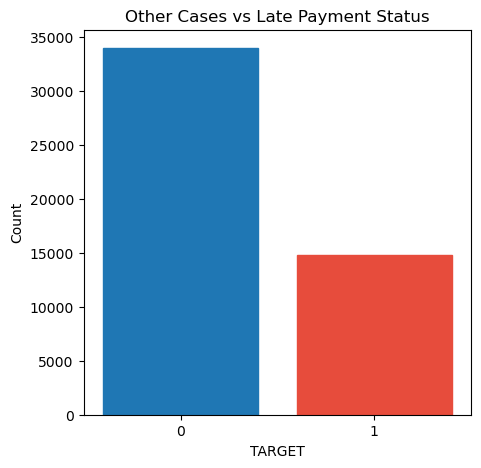

In [61]:
# check the payment difficulties proportion of the data
df_pred = pd.read_csv("predict application_test.csv")

df_target = df_pred['TARGET']
counts = df_target.value_counts()
total = len(df_target)

# Count based on integer class values
late_payment = counts.get(1, 0)   # Payment Difficulties
other_cases = counts.get(0, 0)    # Other Cases

# Calculate proportions (%)
prop_late = (late_payment / total) * 100
prop_other = (other_cases / total) * 100

# Display summary
print('Summary of Payment Difficulties Status')
print(f"Total Records: {total:,}")
print(f"Late Payment (1): {late_payment:,} ({prop_late:.2f}%)")
print(f"Other Cases (0): {other_cases:,} ({prop_other:.2f}%)")
print()

# Bar Chart
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x=df_target.value_counts().index,
    y=df_target.value_counts(),
    color=None)

colors = ['#1f77b4', '#E74C3C']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Other Cases vs Late Payment Status')
plt.ylabel('Count')
plt.show()

### Recommendation

A 30% late-payment rate is high — nearly one-third of customers struggle to pay on time. The recommendation to Reduce Late Payment Customers (TARGET = 1) as follows:
1. Improve Credit Scoring and Approval Policies. Use ML models (XGBoost, Random Forest) to act as a pre-screening tool.
   - Predict high-risk clients before approving credit
   - Set lower credit limits for risky applicants
   - Require additional verification (e.g. proof of income)
   - Higher interest for customers flagged as late-payment risk
2. More Flexible Repayment Schedules. People with irregular income often pay late, then I suggests:
   - Offer smaller, weekly payment options
   - Give customers payment date choices aligned to salary cycles
3. Early-Warning & Intervention Strategy.
   - Early SMS/email/push reminders before due date
   - Suggested minimum payment reminders
   - Chatbot financial help line

### Author
**Ismi Ana Sulasiyah** (ismi.sulasiyah@gmail.com)

PBI Home Credit Final Task

December 1st, 2025